loading the data in order to visualize

In [38]:
data_folder=r'C:\Users\Theodore Tamiolakis\OneDrive\PhD\Lab\data\representational_drift' #r means that I will treat the string as a raw string (/ are special characters)
data="{}\\231108_WEZ8917_24hr_poststim_20231115-071711_cnmf.hdf5".format(data_folder)

In [39]:
mouse_ID='WEZ 8917'
condition='24hr post SD'
date=231108

In [1]:
%pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [26]:
#import necessary packages
import pandas as pd
import h5py
import xarray as xr
import numpy as np
import scipy.sparse 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#opening the hpf5 file
hdf=h5py.File(data)

defining the spatial parameters

In [5]:
A_data=hdf['estimates']['A']['data']
A_indices=hdf['estimates']['A']['indices']
A_indptr=hdf['estimates']['A']['indptr']
A_shape=hdf['estimates']['A']['shape']

In [6]:
#number of neurons
n_neurons=len(hdf['estimates']['C'])

In [7]:
spatial = scipy.sparse.csc.csc_matrix((A_data, A_indices, A_indptr),shape=A_shape).todense()
spatial = np.array(spatial)  # change type to allow np.reshape (?)
spatial = np.reshape(spatial, (512, 512, n_neurons)) # (262144 -> 512x512, i.e. "unflatten")
spatial = np.transpose(spatial, axes=[2, 1,0])  # move neuron index to end
spatial=np.sum(spatial,axis=0) #collapsinf the 3d array into 2d array so that have all of the cells in one matrix

C:\Users\Theodore Tamiolakis\AppData\Local\Temp\ipykernel_10848\1644159018.py:1: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  spatial = scipy.sparse.csc.csc_matrix((A_data, A_indices, A_indptr),shape=A_shape).todense()


plotting and saving the field of view

Text(0.5, 1.0, 'FIELD OF VIEW\nmouse:   WEZ 8917 \ncondition:    24hr post SD \ndate:   231108')

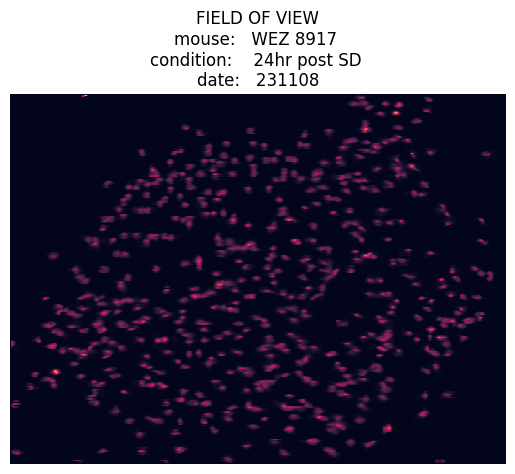

In [46]:
ax=sns.heatmap(test,cbar=False,xticklabels=False, yticklabels=False)
ax.set_title(f'FIELD OF VIEW\nmouse:   {mouse_ID} \ncondition:    {condition} \ndate:   {date}')
plt.savefig(f'{date}_{mouse_ID}_{condition}_fov.pdf')